# Stock market prediction and forecasting using stacked LSTM

## Lets Grow More Data Science Internship | Beginner Level Task 2

### LGMVIP JANUARY2023

Author - VAIBHAV BANSAL

#### Steps:

1. Collect the data and import dataset(https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv)

2. Explore clean and prepare dataset

3. Train, Test and Split

4. Create a stacked LSTM Model

5. Predict test data and plot the output

6. Predict the future 30 days and plot the output.

In [106]:
#importing libraraies
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

In [107]:
df= pd.read_csv("NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [108]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [109]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [110]:
df.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

In [111]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [112]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [113]:
#create target variable
df1=df.reset_index()['Close']
df1.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [114]:
df1.tail()

2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, dtype: float64

In [115]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

### Visualize the dataset

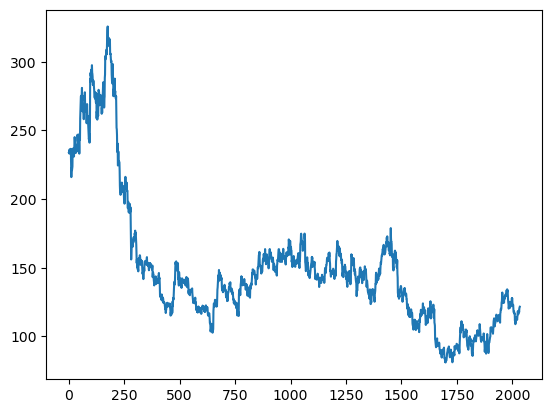

In [117]:
plt.plot(df1)

In [118]:
#Transform the values of target variable between 0 and 1 for LSTM Model
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [119]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


## Train Test Split

In case of time series data we should divide data on the base of date and not randomly.

In [120]:
training_size= int(len(df1)*0.7)
test_size= len(df1)- training_size
train_data,test_data=df1[0:training_size,:1],df1[training_size:len(df1),:1]

In [121]:
train_data.shape

(1424, 1)

In [122]:
test_data.shape

(611, 1)

### Convert an array of values into a dataset matrix

In [123]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [124]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [125]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [126]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [127]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Training and Testing the models

In [135]:
import tensorflow as tf
tf.__version__

'2.11.0'

In [136]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [137]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [138]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 4s 184ms/step - loss: 2.4740e-04 - val_loss: 2.1817e-04
Epoch 2/100
21/21 [==============================] - 4s 189ms/step - loss: 2.3985e-04 - val_loss: 2.1151e-04
Epoch 3/100
21/21 [==============================] - 4s 178ms/step - loss: 2.6286e-04 - val_loss: 2.3283e-04
Epoch 4/100
21/21 [==============================] - 4s 185ms/step - loss: 2.7051e-04 - val_loss: 2.3603e-04
Epoch 5/100
21/21 [==============================] - 5s 229ms/step - loss: 2.6036e-04 - val_loss: 2.3223e-04
Epoch 6/100
21/21 [==============================] - 5s 235ms/step - loss: 2.6893e-04 - val_loss: 2.2395e-04
Epoch 7/100
21/21 [==============================] - 5s 237ms/step - loss: 2.3093e-04 - val_loss: 2.1888e-04
Epoch 8/100
21/21 [==============================] - 5s 239ms/step - loss: 2.4268e-04 - val_loss: 2.2888e-04
Epoch 9/100
21/21 [==============================] - 5s 241ms/step - loss: 2.4604e-04 - val_loss: 2.3257e-04
Epoch 10/100
21/21 

21/21 [==============================] - 4s 180ms/step - loss: 1.9034e-04 - val_loss: 1.2033e-04
Epoch 76/100
21/21 [==============================] - 4s 192ms/step - loss: 2.0025e-04 - val_loss: 1.2837e-04
Epoch 77/100
21/21 [==============================] - 4s 180ms/step - loss: 2.0587e-04 - val_loss: 1.9023e-04
Epoch 78/100
21/21 [==============================] - 4s 185ms/step - loss: 2.0842e-04 - val_loss: 1.3804e-04
Epoch 79/100
21/21 [==============================] - 4s 186ms/step - loss: 1.9886e-04 - val_loss: 1.2939e-04
Epoch 80/100
21/21 [==============================] - 4s 192ms/step - loss: 1.9123e-04 - val_loss: 1.2685e-04
Epoch 81/100
21/21 [==============================] - 4s 185ms/step - loss: 2.3592e-04 - val_loss: 1.2244e-04
Epoch 82/100
21/21 [==============================] - 4s 182ms/step - loss: 2.3464e-04 - val_loss: 1.7575e-04
Epoch 83/100
21/21 [==============================] - 4s 184ms/step - loss: 2.0523e-04 - val_loss: 1.6714e-04
Epoch 84/100
21/21 [===

In [143]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 33ms/step


In [145]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [146]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

166.59629769770834

In [147]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

108.79928683370368

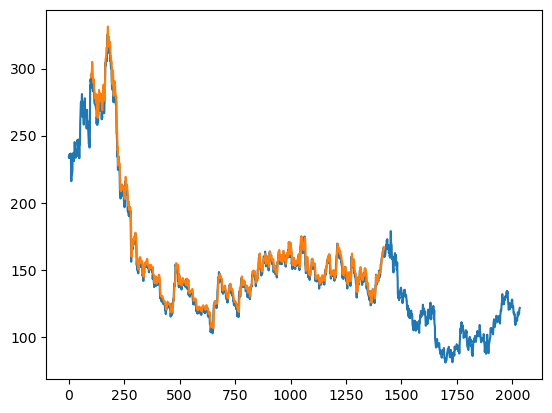

In [148]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)

In [149]:
len(test_data)

611

In [150]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [151]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [152]:
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

In [153]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1664821]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.

11 day output [[0.16877772]]
12 day input [0.14808007 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157
 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379
 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843
 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242
 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261
 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307
 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131
 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065
 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222
 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405
 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758 0.12479575
 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497
 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059
 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327
 0.14971405 0.162173

21 day output [[0.16941935]]
22 day input [0.18055556 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458
 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444
 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268
 0.21568627 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817
 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013
 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458
 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072
 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288
 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967
 0.16648211 0.16746718 0.1679066  0.16813821 0.16826965 0.16835882
 0.16843554 0.1685113

29 day output [[0.17070848]]
[[0.1664821058511734], [0.1674671769142151], [0.16790659725666046], [0.16813820600509644], [0.16826964914798737], [0.16835881769657135], [0.16843554377555847], [0.16851133108139038], [0.1685868501663208], [0.16865865886211395], [0.1687229424715042], [0.1687777191400528], [0.1688234806060791], [0.16886301338672638], [0.16890037059783936], [0.1689402312040329], [0.16898708045482635], [0.169044628739357], [0.1691155731678009], [0.1692015826702118], [0.16930295526981354], [0.16941934823989868], [0.16954974830150604], [0.1696924865245819], [0.16984589397907257], [0.17000800371170044], [0.17017708718776703], [0.17035123705863953], [0.1705288589000702], [0.17070847749710083]]


In [154]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [155]:
len(df1)

2035

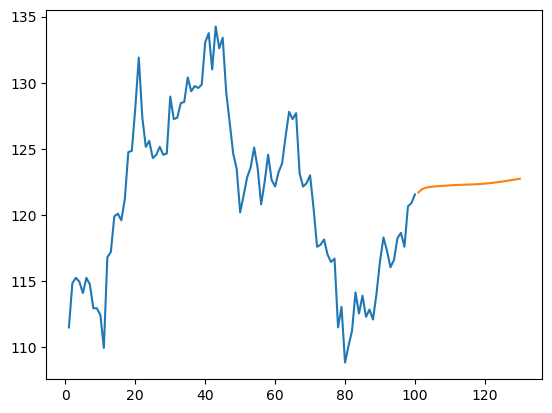

In [156]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

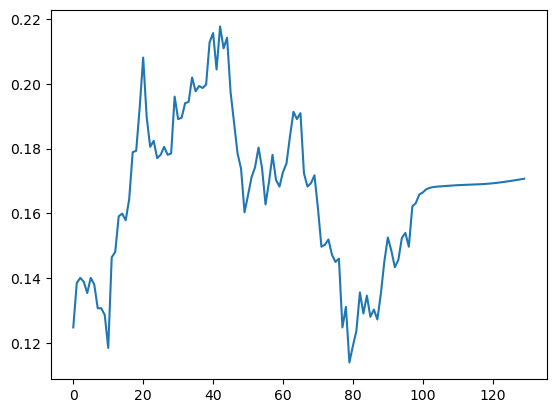

In [157]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1935:])

In [158]:
df3=scaler.inverse_transform(df3).tolist()

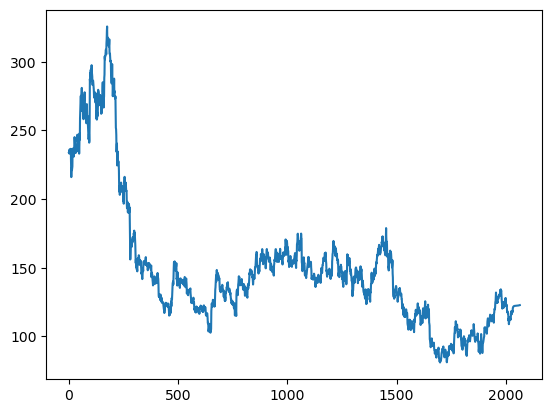

In [159]:
plt.plot(df3)